In [1]:
# importing library to conduct data analysis 
import pandas as pd
import matplotlib.pyplot as plt

# reading the given KPMG data set excel 
df = pd.ExcelFile("Downloads/new.xlsx")
df3 = pd.read_excel(df, "CustomerDemographic") # reading CustomerDemographic sheet

In [2]:
DOB_counts = df3["DOB"].value_counts()
DOB_counts

1978-01-30    7
1976-07-16    4
1978-08-19    4
1976-09-25    4
1964-07-08    4
             ..
1972-06-05    1
1972-06-21    1
1972-07-11    1
1972-07-17    1
2002-03-11    1
Name: DOB, Length: 3448, dtype: int64

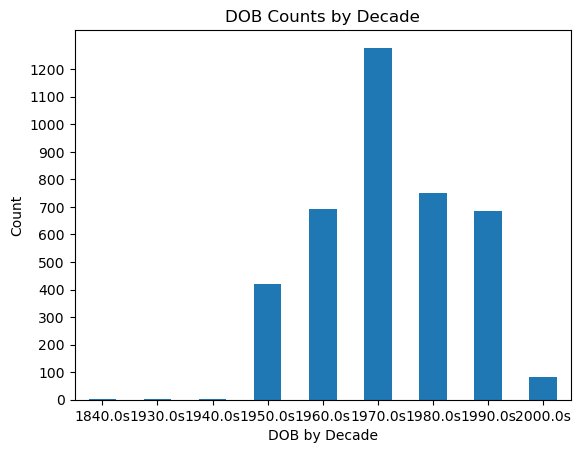

In [13]:
grouped_data = df3.groupby(df3['DOB'].dt.year // 10 * 10).size() 
# computing the size(count) of each DOB group(by decade)

# Plot bar chart
char = grouped_data.plot(kind='bar')
char.set_xlabel('DOB by Decade')
char.set_ylabel('Count')
char.set_title('DOB Counts by Decade')

# Set x-axis labels to 10-year intervals
num = range(len(grouped_data.index))
labels = [f'{x}s' for x in grouped_data.index] 
plt.xticks(num, labels, rotation=0) # setting x axis with certain frequency
plt.yticks(range(0, grouped_data.values.max()+1, 100)) # setting frequency in y axis
plt.show()
for i, v in enumerate(grouped_data):
    char.text(i, v, str(v), ha='center', va='bottom')

In [4]:
df3["past_3_years_bike_related_purchases"].value_counts()

19    56
16    56
20    54
67    54
2     50
      ..
8     28
86    27
95    27
85    27
92    24
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64

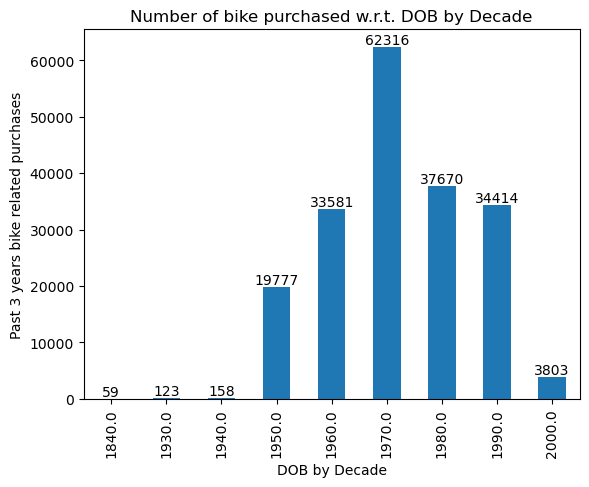

In [12]:
gdn = df3.groupby(df3['DOB'].dt.year // 10 * 10) # new grouped data by grouping the DOB by decade
gd = gdn["past_3_years_bike_related_purchases"].sum() 
# computing the sum of corresponding bike purchases of each group in the grouped data  
plot = gd.plot(kind='bar')
plot.set_xlabel("DOB by Decade")
plot.set_ylabel("Past 3 years bike related purchases")
plot.set_title("Number of bike purchased w.r.t. DOB by Decade")
for i, v in enumerate(gd):
    plot.text(i, v, str(v), ha='center', va='bottom')

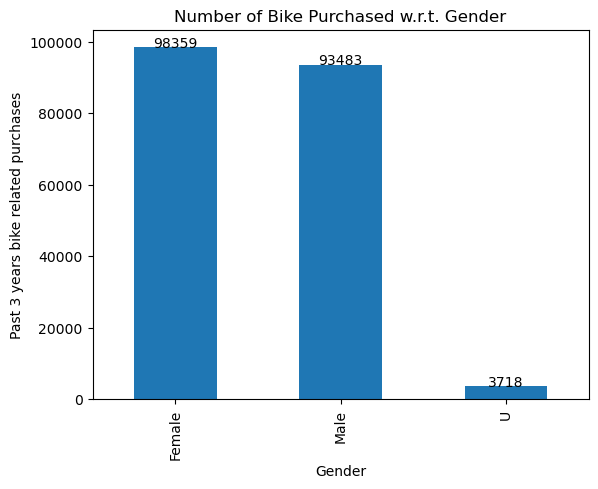

In [70]:
# Number of Bike Purchased w.r.t. Gender
df3_gd = df3.groupby("gender")["past_3_years_bike_related_purchases"].sum()
plot2 = df3_gd.plot(kind = "bar")
plot2.set_xlabel("Gender")
plot2.set_ylabel("Past 3 years bike related purchases")
plot2.set_title("Number of Bike Purchased w.r.t. Gender")
for i, v in enumerate(df3_gd):
    plot2.text(i, v, str(v), ha = "center")

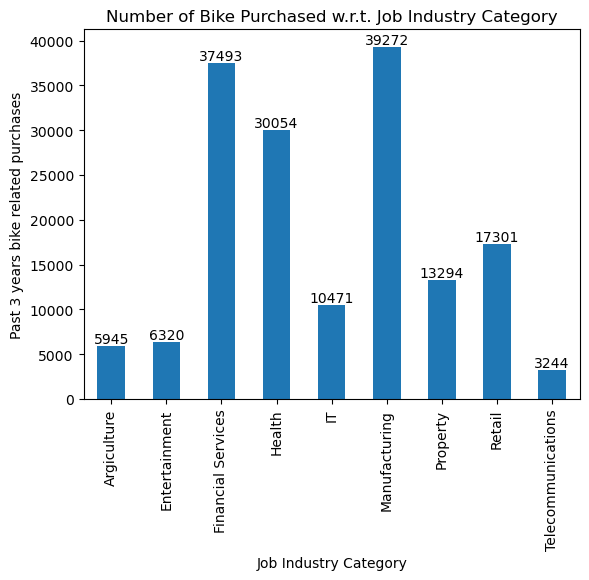

In [10]:
# generating a plot of Number of Bike Purchased w.r.t. Job Industry Category
df3["job_industry_category"].value_counts()
dfnew = df3.groupby(df3["job_industry_category"])
gdfnew = dfnew["past_3_years_bike_related_purchases"].sum()
plot3 = gdfnew.plot(kind = "bar")
plot3.set_xlabel("Job Industry Category")
plot3.set_ylabel("Past 3 years bike related purchases")
plot3.set_title("Number of Bike Purchased w.r.t. Job Industry Category")
for i, v in enumerate(gdfnew):
    plot3.text(i, v, str(v), ha='center', va='bottom')

In [14]:
df2 = pd.read_excel(df, "NewCustomerList") 

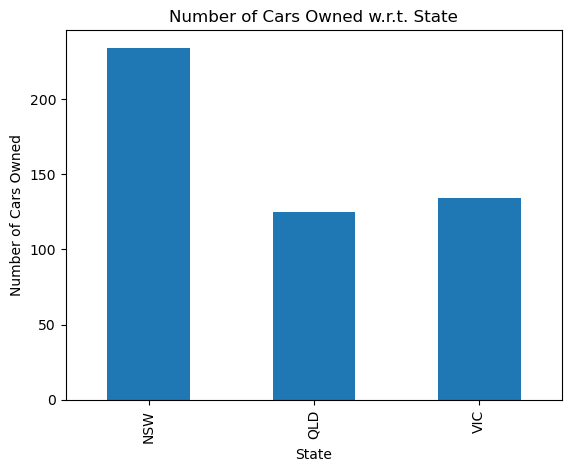

In [65]:
df2_yes = df2[df2['owns_car'] == 'Yes']

# Group the filtered dataframe by the "state" column
df2_grouped = df2_yes.groupby('state')

# Count the number of "Yes" values for each state
df2_new = df2_grouped.size()

plot4 = df2_new.plot(kind="bar")
plot4.set_xlabel("State")
plot4.set_ylabel("Number of Cars Owned")
plot4.set_title("Number of Cars Owned w.r.t. State")

# Show the plot
plt.show()


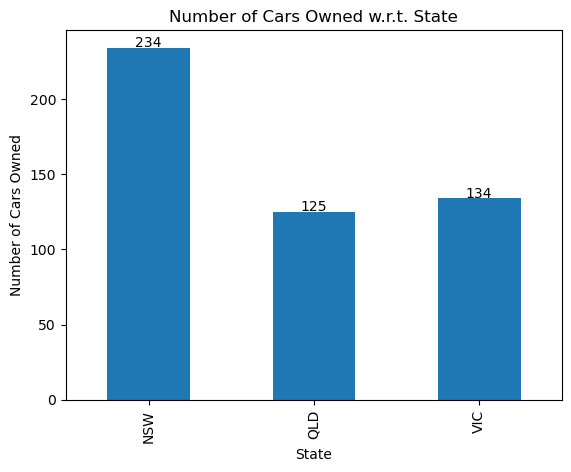

In [67]:
df2_grouped = df2.groupby("state")["owns_car"].apply(lambda x: (x == "Yes").sum())

# create the bar plot
plot4 = df2_grouped.plot(kind="bar")

# set the x and y labels and the title
plot4.set_xlabel("State")
plot4.set_ylabel("Number of Cars Owned")
plot4.set_title("Number of Cars Owned w.r.t. State")

# iterate over each bar
for i, v in enumerate(df2_grouped):
    # add the value above the bar
    plot4.text(i, v + 0.5, str(v), ha='center')

# show the plot
plt.show()

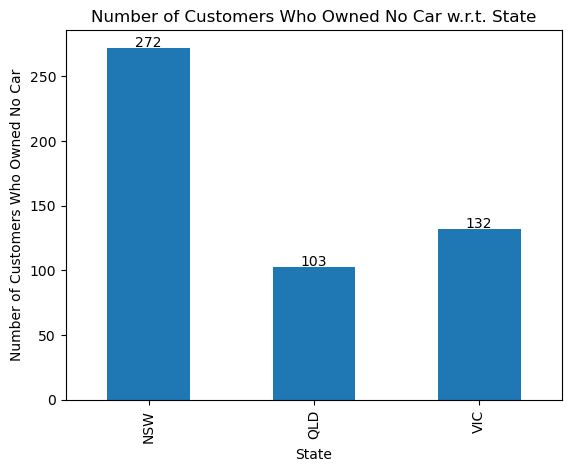

In [69]:
df2_gd = df2.groupby("state")["owns_car"].apply(lambda x: (x == "No").sum())
plot5 = df2_gd.plot(kind = "bar")
plot5.set_xlabel("State")
plot5.set_ylabel("Number of Customers Who Owned No Car")
plot5.set_title("Number of Customers Who Owned No Car w.r.t. State")
for i, v in enumerate(df2_gd):
    plot5.text(i, v+0.5, str(v), ha = "center")
plt.show()